In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_excel("/Users/davidalexanderbehrens/Documents/Master Thesis Code/BirdvsUAV.xlsx")

In [3]:
df

,m_inst_pos_1,m_inst_pos_2,m_inst_pos_3,sp_bandwdth_pos_1,sp_bandwdth_pos_2,sp_bandwdth_pos_3,tot_en_pos_1,tot_en_pos_2,tot_en_pos_3,spec_entrpy_pos_1,...,sp_bandwdth_neg_1,sp_bandwdth_neg_2,sp_bandwdth_neg_3,tot_en_neg_1,tot_en_neg_2,tot_en_neg_3,spec_entrpy_neg_1,spec_entrpy_neg_2,spec_entrpy_neg_3,uav
0,0.279154,0.184779,0.077394,0.284654,0.068712,0.034083,2.089997e+08,2.197521e+07,5.586790e+06,5.290398,...,0.301149,0.067972,0.026011,2.109217e+08,2.124947e+07,5.761494e+06,5.334354,4.571037,3.591372,0
1,0.246694,0.178975,0.071372,0.308039,0.094581,0.044065,2.083827e+08,7.750284e+06,2.870942e+06,5.136373,...,0.303626,0.085070,0.033202,2.054797e+08,9.952555e+06,2.700863e+06,5.079679,4.732281,3.928882,0
2,0.284932,0.165726,0.054598,0.275080,0.075584,0.035403,2.032150e+08,1.126337e+07,4.750953e+06,4.974233,...,0.254741,0.074710,0.037369,2.012768e+08,1.138283e+07,4.599558e+06,4.976915,4.722964,3.630174,0
3,0.279412,0.166550,0.076643,0.266360,0.079038,0.035071,1.991674e+08,1.366110e+07,3.043780e+06,5.233682,...,0.266922,0.075963,0.034107,1.975589e+08,1.384539e+07,3.163335e+06,5.231142,4.967512,4.387015,0
4,0.285376,0.160278,0.071371,0.245696,0.090605,0.034121,2.287391e+08,2.443902e+07,3.774765e+06,5.380925,...,0.246659,0.057385,0.036432,2.343095e+08,1.506431e+07,4.937407e+06,5.427064,4.679306,4.009416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.240496,0.079575,0.017358,0.282009,0.077321,0.032958,3.757590e+08,8.676862e+08,5.492147e+08,4.680451,...,0.217016,0.086040,0.060630,3.260325e+08,7.631648e+08,1.209091e+08,4.454030,2.659460,2.528703,1
2556,0.278392,0.097899,0.026552,0.269018,0.104258,0.033484,2.545027e+08,6.251128e+08,3.186090e+08,4.602906,...,0.275168,0.097341,0.044193,3.061454e+08,3.201621e+08,4.565373e+08,4.817721,3.708017,2.547270,1
2557,0.276925,0.161060,0.044447,0.223741,0.081181,0.034430,2.707467e+08,5.245484e+07,2.657854e+08,4.907760,...,0.226436,0.083594,0.040132,2.408583e+08,2.910689e+07,2.853327e+08,4.792529,3.949840,2.223567,1
2558,0.286242,0.178897,0.052641,0.249786,0.102926,0.076870,2.657673e+08,2.389860e+07,2.482058e+08,4.991167,...,0.255393,0.105072,0.034115,2.748582e+08,1.331110e+08,4.277573e+07,4.934052,4.143450,3.320768,1


In [5]:
np.random.seed(42)
X = df.drop(columns="uav")
y = df["uav"]

#Train-Test-Split (70% Training, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_prob = gb.predict_proba(X_test)[:, 1]

y_pred_gb = gb.predict(X_test)


accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)

accuracy_gb, report_gb

(0.99609375,
 {'0': {'precision': 0.9948051948051948,
   'recall': 0.9973958333333334,
   'f1-score': 0.9960988296488947,
   'support': 384},
  '1': {'precision': 0.9973890339425587,
   'recall': 0.9947916666666666,
   'f1-score': 0.9960886571056062,
   'support': 384},
  'accuracy': 0.99609375,
  'macro avg': {'precision': 0.9960971143738768,
   'recall': 0.99609375,
   'f1-score': 0.9960937433772505,
   'support': 768},
  'weighted avg': {'precision': 0.9960971143738768,
   'recall': 0.99609375,
   'f1-score': 0.9960937433772505,
   'support': 768}})

In [8]:
cm = confusion_matrix(y_test, y_pred_gb)
cm_labels = ["Bird", "UAV"]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
report = classification_report(y_test, y_pred_gb, target_names=cm_labels, output_dict=True)

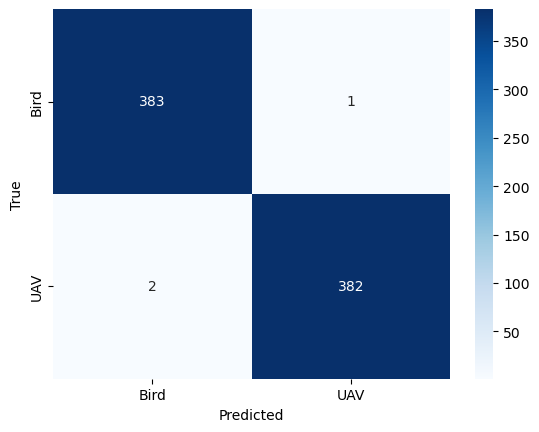

In [9]:
# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/confusion_amtrix.png", transparent=True)
plt.show()

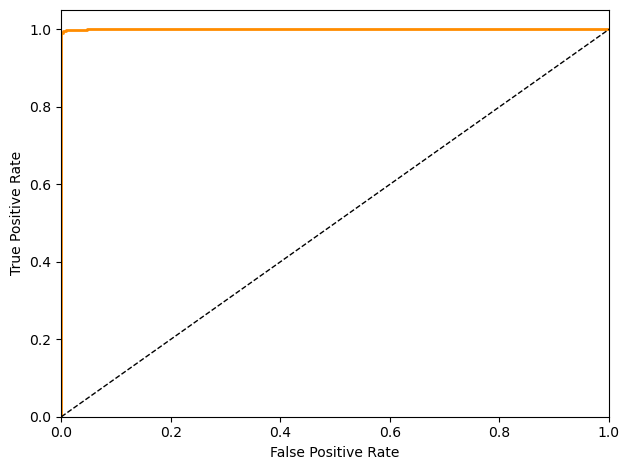

In [11]:
# ROC
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.savefig("/ROC.png", transparent=True)
plt.show()